In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#reviews_datasets=pd.read_csv('D:/so-data/xamarin-posts.csv'  )
reviews_datasets=pd.read_excel('D:/so-data/framework-related-posts/xamarin.xlsx'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Id  AcceptedAnswerId  AnswerCount  \
0   1342377           1342421            6   
1   1333303           1342488            1   
2   1343536           1343600            6   
3   1674518           1674547            7   
4     31885             31949            4   
5    282876            282937            3   
6    298638            298690            1   
7    298708            298713            9   
8    104579            281337            3   
9   1344300           1344305            2   
10  1592632           1592652            1   
11    14264             14265            2   
12    32395             32418            1   
13   281510            281557            3   
14   294017            294112            5   
15   294449            294457            5   
16      650               655            7   
17    20586             20737            6   
18   289261            289263            1   
19   289456            289457            3   

                                 

In [4]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title']+' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."


In [5]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Can you really use the Visual Studio  IDE to code in Python? I have a friend who I am trying to teach how to program. He comes from a very basic PHP background, and for some reason is ANTI C#, I guess because some of his PHP circles condemn anything that comes from Microsoft. Anyways - Ive told him its possible to use either Ruby or Python with the VS IDE, because Ive read somewhere that this is possible.  But I was wondering. Is it really that practical, can you do EVERYTHING with Python in VS that you can do with C# or VB.net.  I guess without starting a debate... I want to know if youre a developer using VS IDE with a language other than VB.net or C#, then please leave an answer with your experience.  If you are (like me) either a VB.net or C# developer, please dont post speculative or subjective answers. This is a serious question, and I dont want it being closed as subjective. ... Thank you very much. update So far weve established that IronPython is the right tool for the job. 

In [8]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['can', 'you', 'really', 'use', 'the', 'visual', 'studio', 'ide', 'to', 'code', 'in', 'python', 'have', 'friend', 'who', 'am', 'trying', 'to', 'teach', 'how', 'to', 'program', 'he', 'comes', 'from', 'very', 'basic', 'php', 'background', 'and', 'for', 'some', 'reason', 'is', 'anti', 'guess', 'because', 'some', 'of', 'his', 'php', 'circles', 'condemn', 'anything', 'that', 'comes', 'from', 'microsoft', 'anyways', 'ive', 'told', 'him', 'its', 'possible', 'to', 'use', 'either', 'ruby', 'or', 'python', 'with', 'the', 'vs', 'ide', 'because', 'ive', 'read', 'somewhere', 'that', 'this', 'is', 'possible', 'but', 'was', 'wondering', 'is', 'it', 'really', 'that', 'practical', 'can', 'you', 'do', 'everything', 'with', 'python', 'in', 'vs', 'that', 'you', 'can', 'do', 'with', 'or', 'vb', 'net', 'guess', 'without', 'starting', 'debate', 'want', 'to', 'know', 'if', 'youre', 'developer', 'using', 'vs', 'ide', 'with', 'language', 'other', 'than', 'vb', 'net', 'or', 'then', 'please', 'leave', 'an', 'ans

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['is', 'mono', 'really', 'cross_platform', 'official', 'mono', 'project', 'website', 'says', 'that', 'mono', 'works', 'successfully', 'on', 'windows', 'linux', 'and', 'mac', 'os', 'is', 'that', 'true', 'want', 'to', 'build', 'applications', 'which', 'work', 'at', 'least', 'on', 'windows', 'and', 'linux', 'is', 'it', 'possible', 'with', 'mono', 'know', 'that', 'similar', 'topics', 'already', 'exist', 'cross_platform', 'net', 'but', 'they', 'may', 'be', 'outdated']


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."
7722583,7722620,2,<p>I am having a hard time understanding what ...,2011-10-12 01:13:33.767,2,NaN,2011-10-11 07:19:21.543,5,2013-04-15 19:41:49.047,2013-04-15 19:41:49.047,...,21,<dart>,What is the role of Google's Dart programming ...,3830,<p>You may checkout the technical aspects on <...,2011-10-11 07:22:05.483,164.0,What is the role of Google's Dart programming ...,1,What is the role of Google's Dart programming ...
7722867,7723239,2,<blockquote>\n <p><strong>Notice:</strong> Th...,NaN,4,NaN,2011-10-11 07:47:57.973,3,2014-02-18 00:49:27.573,2014-02-18 00:49:27.573,...,12,<interface><dart>,Why can Dart's built-in List interface be inst...,1039,<p>The syntax for defining an interface is:</p...,2011-10-11 08:27:48.873,2391.0,Why can Dart's built-in List interface be inst...,1,Why can Dart's built-in List interface be inst...
7712107,7712138,2,"<p>I don't see the point of <a href=""http://ww...",2012-08-30 14:41:38.983,3,NaN,2011-10-10 11:28:28.783,7,2015-10-29 21:53:31.640,2012-12-27 19:35:12.373,...,49,<javascript><node.js><dart>,What is the benefit of the Dart language over ...,10329,"<p>The <a href=""http://www.dartlang.org/docs/t...",2011-10-10 11:32:06.053,218.0,What is the benefit of the Dart language over ...,1,What is the benefit of the Dart language over ...
7724136,7724281,2,<p>Will I get replacement of <strong>node.js</...,2011-10-11 11:03:28.730,2,NaN,2011-10-11 09:46:44.253,2,2019-06-29 16:49:24.597,2019-06-29 16:49:24.597,...,9,<javascript><node.js><dart>,Comparison of Javascript with Google Dart,6899,"<p>You can read about Dart at <a href=""http://...",2011-10-11 09:59:45.297,781.0,Comparison of Javascript with Google Dart 

In [13]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

[['really', 'use', 'visual', 'studio', 'ide', 'code', 'python', 'friend', 'try', 'teach', 'program', 'come', 'basic', 'php', 'background', 'reason', 'anti', 'guess', 'php', 'circle', 'condemn', 'come', 'microsoft', 'anyways', 've', 'tell', 'possible', 'use', 'ruby', 'python', 'ide', 've', 'read', 'somewhere', 'possible', 'wonder', 'really', 'practical', 'python', 'net', 'guess', 'start', 'debate', 'want', 'know', 're', 'developer', 'use', 'ide', 'language', 'net', 'leave', 'answer', 'experience', 'vb', 'net', 'developer', 'do', 'post', 'speculative', 'subjective', 'answer', 'serious', 'question', 'do', 'want', 'close', 'subjective', 'thank', 'much', 'update', 'far', 've', 'establish', 'ironpython', 'right', 'tool', 'job', 'practical', 'really', 'mono', 'example', 'run', 'code', 'linux', 'ever', 'try', 'use', 'practical', 'lot', 'code', 'refactoring', 'need', 'take', 'place', 'support', 'net'], ['get', 'console', 'output', 'display', 'gallio', 'xunit', 'net', 'previously', 'execute', 'u

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,1342377,1342421,6,<p>I have a friend who I am trying to teach ho...,NaN,0,NaN,2009-08-27 16:57:39.620,0,2009-08-27 19:34:19.930,...,490,1342377,<p>If you want to use Python together with the...,2009-08-27 17:03:58.360,379,Can you really use the Visual Studio 2008 IDE ...,1,Can you really use the Visual Studio 2008 IDE ...,"[really, use, visual, studio, ide, code, pytho...",Can you really use the Visual Studio 2008 IDE ...
1,1333303,1342488,1,<p>Previously when executing unit tests with x...,NaN,0,NaN,2009-08-26 08:57:16.370,1,2009-08-27 17:16:48.990,...,925,1333303,<p>This is fixed in Gallio v3.1.</p>\n,2009-08-27 17:16:48.990,116372,Getting Console output to display from Gallio ...,1,Getting Console output to display from Gallio ...,"[get, console, output, display, gallio, xunit,...",Getting Console output to display from Gallio ...
2,1343536,1343600,6,<p>Is it possible to make a checkbox large? So...,NaN,0,NaN,2009-08-27 20:18:17.797,0,2020-09-26 17:42:01.750,...,6449,1343536,<p>You'll probably have to swap an image out w...,2009-08-27 20:32:48.360,871,size checkboxes <p>Is it possible to make a ch...,1,size checkboxes <p>Is it possible to make a ch...,"[size, checkboxe, possible, make, checkbox, la...",size checkboxes <p>Is it possible to make a ch...
3,1674518,1674547,7,<p>I'm having an issue with duplicates being i...,NaN,3,NaN,2009-11-04 15:25:22.413,0,2009-11-04 17:52:30.413,...,415,1674518,<p>You could wrap your fields around isnull's ...,2009-11-04 15:29:21.110,239,Using if exists <p>I'm having an issue with du...,1,Using if exists <p>I'm having an issue with du...,"[use, exist, m, issue, duplicate, insert, refr...",Using if exists <p>I'm having an issue with du...
4,31885,31949,4,<p>I had used Server Explorer and related tool...,NaN,0,NaN,2008-08-28 09:09:58.983,1,2011-09-21 09:30:04.700,...,12970,31885,<p>Here is instructions on how to connect to y...,2008-08-28 10:03:04.630,3186,Does Visual Studio Server Explorer support cus...,1,Does Visual Studio Server Explorer support cus...,"[visual, studio, server, explorer, support, cu...",Does Visual Studio Server Explorer support cus...
5,282876,282937,3,"<p>Ok, this is driving me nuts.</p>\n\n<p>I've...",NaN,1,NaN,2008-11-12 03:01:16.500,3,2012-09-12 07:14:50.557,...,15015,282876,<p>What edition of VS2008 are you running? I ...,2008-11-12 03:31:54.647,1838,How to enable debugging of stored procedures i...,1,How to enable debugging of stored procedures i...,"[enable, debug, stored_procedure, visual, stud...",How to enable debugging of stored procedures i...
6,298638,298690,1,"<p>OK, so this is the background... I'm going ...",NaN,0,NaN,2008-11-18 12:49:24.900,0,2008-11-18 19:28:24.953,...,1932,298638,"<p>In Visual Studio, select the <strong>View</...",2008-11-18 13:18:03.813,1719,"What/Where is the ""Symbol Browser"" in Visual S...",1,"What/Where is the ""Symbol Browser"" in Visual S...","[symbol, brows, visual, studio, ok, background...","What/Where is the ""Symbol Browser"" in Visual S..."
7,298708,298713,9,<p>I'm developing a C++ command-line applicati...,NaN,1,NaN,2008-11-18 13:27:26.323,82,2020-05-13 02:56:37.723,...,416448,298708,"<p>Yes, it's in the <em>Debugging</em> section...",2008-11-18 13:28:30.547,64,Debugging with command-line parameters in Visu...,1,Debugging with command-line parameters in Visu...,"[debug, command, line, parameter, visual, stud...",Debugging with command-line parameters in Visu...
8,104579,281337,3,<p>I'd like to increase developers' &quot;comf...,NaN,3,NaN,2008-09-19 19:02:31.237,0,2009-06-30 18:03:20.610,...,5684,104579,<p>You might be stuck with one of those MSSCCI...,2008-11-11 16:13:27.167,4569056,CVS and Visual Studio 2008 - integration optio...,1,CVS and Visual Studio 2008 - integration optio...,"[cv

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10
15
20
25
30
35
40
45
50


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


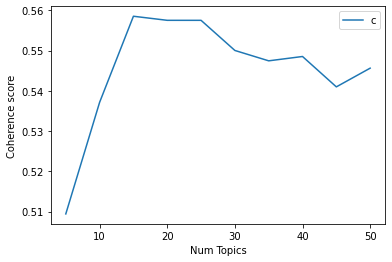

In [34]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word,  iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

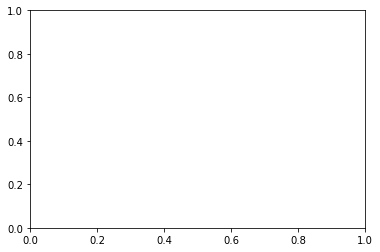

In [17]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(15, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
for i in iteration_based_coherence_values:
    print(i)

0.5571260080557583
0.5505698377629605
0.5548819496976664
0.5606876965608959
0.5559249696364131
0.5692164040479031


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

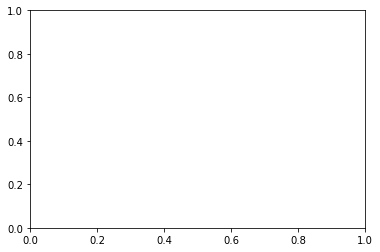

In [19]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=id2word, iterations=3500, alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_excel("D:/so-data/final-data-september/xamarin_topic_keywords.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents2, contents], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'title', 'texts']
df_dominant_topic.to_excel("D:/so-data/final-data-september/final_topics_xamarin.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
